# Environment Setup

This notebook is designed for Python version **3.11.5** and requires several external packages to run correctly. Below is a list of necessary packages:

- **IPython**: For powerful interactive shells.
- **Pillow** (PIL): For image processing capabilities.
- **ipywidgets**: For interactive HTML widgets.
- **joblib**: For lightweight pipelining.
- **matplotlib**: For creating visualizations.
- **networkx**: For creating and manipulating complex networks.
- **numba**: For JIT compilation.
- **numpy**: For support with large, multi-dimensional arrays and matrices.
- **pandas**: For data manipulation and analysis.
- **requests**: For sending HTTP requests.
- **scipy**: For scientific and technical computing.
- **seaborn**: For drawing attractive statistical graphics.
- **scikit-learn** (sklearn): For machine learning.
- **statsmodels**: For statistical modeling.
- **d3blocks**: For creating chord diagrams.

To install these packages, run the following command in a code cell:

```python
!pip install IPython Pillow ipywidgets joblib matplotlib networkx numba numpy pandas requests scipy seaborn scikit-learn statsmodels d3blocks
```

Ensure that all packages are installed before proceeding to run the analyses in this notebook.

In [2]:
%load_ext autoreload
%autoreload 2

from abm import *
from read_sbml import create_model, read_interaction_tables

# Uncompartmentalized Model

## Loading the Submaps

In [20]:
model = create_model("Example Maps/AIR")

## Load the Data File

In [21]:
data = pd.read_csv("Data Files/ColitisFCData_pvalues.txt", index_col = 0)

## Perform Enrichment Analysis

In [22]:
results = model.data_enrichment(data)

['DSSd02', 'DSSd04', 'DSSd06', 'DSSd07', 'DSSd08', 'DSSd10', 'DSSd12', 'DSSd14']


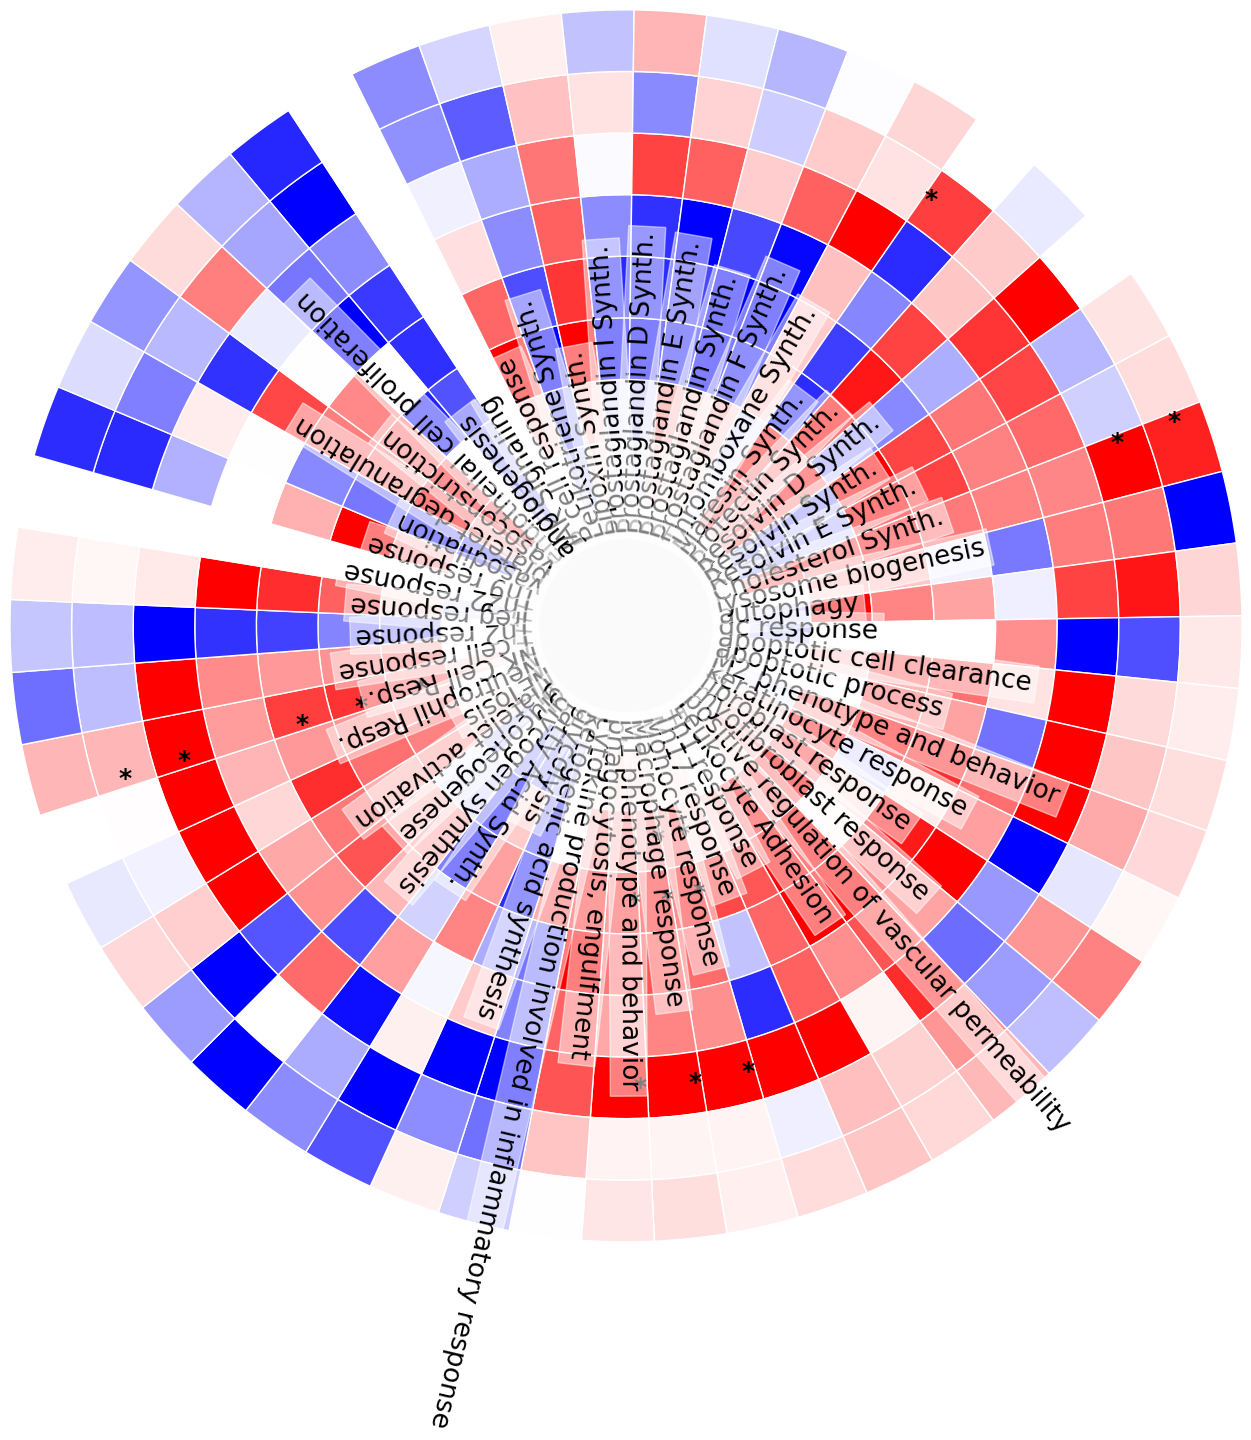

In [28]:
model.circle_plot(results, figsize = (10,10))

# Compartmental Boolean Model

In [8]:
sarcopenia_model = create_model("Example Maps/Sarcopenia", compartment_specific = True)

In [15]:
sarcopenia_model.chord_plot()

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [C:\Users\Matti\AppData\Local\Temp\d3blocks\chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> Set [save_button]: True
[d3blocks] >INFO> Set [fontsize]: 12
[d3blocks] >INFO> File already exists and will be overwritten: [C:\Users\Matti\AppData\Local\Temp\d3blocks\chord.html]
[d3blocks] >INFO> Open browser: C:\Users\Matti\AppData\Local\Temp\d3blocks\chord.html


## Boolean Simulation

In [17]:
for node in sarcopenia_model.nodes:
    if node.compartment == "":
        node.default_state = False

perturbations = {
    sarcopenia_model.get_node_from_name("alcohol consumption"): [-1],
    sarcopenia_model.get_node_from_name("exercise"): [-1],
    sarcopenia_model.get_node_from_name("food intake"): 5*[1] + 10*[-1],
    sarcopenia_model.get_node_from_name("cirrhosis"): [-1],
    sarcopenia_model.get_node_from_name("lep"): [-1],
    sarcopenia_model.get_node_from_name("intestinal dysfunction"): [-1],
}

In [29]:
sarcopenia_model.show_boolean_simulation("Liver.xml", max_steps = 500, conditions = perturbations)

interactive(children=(IntSlider(value=0, description='step', max=499), Output()), _dom_classes=('widget-intera…

## Spatial Boolean Simulation

In [3]:
abm = ABM(r"Example Maps/MASLD", 
          agentmaps = ["Hepatocyte.xml", "Hepatocyte Apoptosis.xml", "Vitamins and Trace Elements.xml", "Bile Acids.xml", "Cholesterol Synthesis and Effects.xml"], 
          outsidemaps = ["Digestion and Absorption.xml", "Adipose Tissue.xml", "Endocrine Pancreas.xml"], 
          image = r"Example Maps/MASLD/liver_agents.png",  
          grid_size = 50, 
          agents_per_quadrant = 5, 
          seed = 9157)

In [4]:
abm.run_abm(steps = 400,food_prob = 100*[1]+100*[-1],
            perturbednodes = ["cirrhosis", "intestinal dysfunction", "alcohol consumption", "portal hypertension", "Exercise", "acot1", "ADM", "Alcohol Consumption"])

Progress |██████████████████████████████████████████████████| 100.000% Complete
Agent Step Time:0.3774678707122803
Boolean Time:5.487490177154541


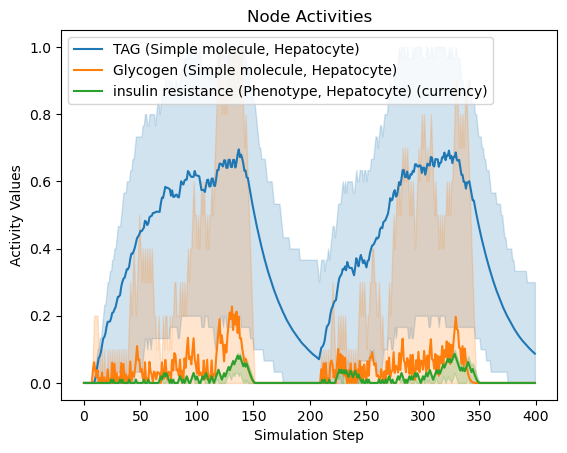

In [6]:
abm.show_activity_plot([
    abm.agent_model.get_node_from_name("tag", compartment = "hepatocyte"),
    abm.agent_model.get_node_from_name("glycogen", compartment = "hepatocyte"),
    abm.agent_model.get_node_from_name("insulin resistance", compartment = "hepatocyte"),
], normalize = True, pi = 100, steps = None)

In [5]:
abm.show_agents(r"LiverMap.xml", abm.agent_model.get_node_from_name("tag", compartment = "hepatocyte"))

1.0


interactive(children=(IntSlider(value=0, description='step', max=399), Output()), _dom_classes=('widget-intera…